In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import pandas as pd
import seaborn as sns
import time
# Lasso and ridge
import os
import copy
import skimage 
from skimage import io as ios
import scipy.io as sio
from numpy.linalg import matrix_rank
import numpy.linalg as la
from tqdm import trange
from  my_operator import *
from criterion import *
from criterion_val import *
from visualization import *
from SKPD import *
%matplotlib inline
# sns.set()
warnings.filterwarnings('ignore')
os.getcwd()

'c:\\Users\\student\\Desktop\\SKPD_github'

# 1. Matrxi Case

## 1.1 generate simulated X and Y

In [2]:
## import the true signal as paper descripted
beta_true = np.load("circles.npy")
np.random.seed(539)
## image shape
img_shape_m,img_shape_n,img_shape_d = 128,128,1
## sample size 
N = 1000
## noise level
sigma = 3
epsilon = np.random.normal(0,1,N) * sigma
X = []
Y = []
for i in trange(N):
    Xi = np.random.normal(0,1,img_shape_m * img_shape_n * img_shape_d).reshape(img_shape_m,img_shape_n,img_shape_d).squeeze()
    X.append(Xi)
    Y.append(np.vdot(Xi,beta_true) + epsilon[i])
    del Xi

100%|██████████| 1000/1000 [00:00<00:00, 1381.09it/s]


## 1.2 training

In [4]:
tic = time.time()
## lambda 1 candidate, corresponds to the lambda in the paper
lmbda_set = [0.4,0.6,1]
## We set lambda2 equals 0 all the time.
lmbda2_set = [0]
## terms: 1 or 3
R = 3
na = True
nb = True
## for p1,p2,p3 in our paper, p3 = 1 in matrix case
m1_list,n1_list,d1_list = [16],[16],[1]
## for d1,d2,d3 in our paper, d3 = 1 in matrix case
m2_list,n2_list,d2_list = [8],[8],[1]
input_params = {
    "m1_list":m1_list,
    "n1_list":n1_list,
    "m2_list":m2_list,
    "n2_list":n2_list,
    "d1_list":d1_list,
    "d2_list":d2_list,
    "lmbda_set":lmbda_set,
    "lmbda2_set":lmbda2_set,
    ## Z_train is None, when not consider covariate
    "Z_train":None,
    "X_train":X,
    "Y_train":Y,
    ## n_cores is the number of cores for parallel computing, when n_cores = None, we only use a single core in our paper
    ## you can use n_cores > 1 for accelerating your computing
    "R":R, "na":na,"nb":nb,"n_cores":None,"max_iter":20,"print_iter":30}
a_hat,b_hat,gamma_hat,Y_hat,err_beta,fN,solver,m1,n1,m2,n2,d1,d2,lmbda1,lmbda2 = fun_val_parallel(**input_params)
print("cost time: ",time.time()-tic)
print("seletecd lambda: ",lmbda1)

Iteration m1 x n1 x d1 = 16 x 16 x 1 m2 x n2 x d2 = 8 x 8 x 1
MBIC values:  [6329.369554782415, 5474.702894718623, 5799.255073285322]
cost time:  9.53649091720581
seletecd lambda:  0.6


In [5]:
A,B,kron_ab = func_kron_ab(a_hat,b_hat,R,m1,n1,m2,n2,d1,d2)
beta_hat = kron_ab[-1]
## print measurement: FPR, TPR and RMSE
print(np.array(error(beta_hat,beta_true))*100)

[ 5.95077437 97.44835966 11.57300489]


<AxesSubplot:>

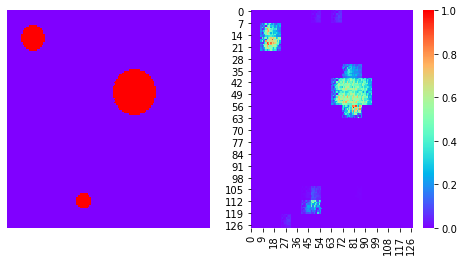

In [6]:
plt.figure(figsize= (8,4))
ax = plt.subplot(1,2,1)
sns.heatmap(fun_normalization(beta_true),cmap = "rainbow",cbar = False)
ax.set_xticks([])
ax.set_yticks([])
ax = plt.subplot(1,2,2)
sns.heatmap(fun_normalization(beta_hat),cmap = "rainbow",cbar = True)

# 2. Tensor case

## 3.1 generate underlying true signal, X and Y

In [7]:
## import the true signal as paper descripted
beta_true = np.load("2-balls.npy")
np.random.seed(5)
## image shape
img_shape_m,img_shape_n,img_shape_d = 32,32,32
## sample size 
N = 1000
## noise level
sigma = 3
epsilon = np.random.normal(0,1,N) * sigma
X = []
Y = []
for i in trange(N):
    Xi = np.random.normal(0,1,img_shape_m * img_shape_n * img_shape_d).reshape(img_shape_m,img_shape_n,img_shape_d).squeeze()
    X.append(Xi)
    Y.append(np.vdot(Xi,beta_true) + epsilon[i])
    del Xi

100%|██████████| 1000/1000 [00:01<00:00, 748.26it/s]


## 3.2 training

In [8]:
tic = time.time()
## lambda-1 candidate set, corresponds to the lambda in the paper
lmbda_set = [0.4,0.6,1]
## We set lambda2 equals 0 all the time.
lmbda2_set = [0]
## We refer set R = 1 in tensor case
R = 1
na = True
nb = True
## for p1,p2,p3 in our paper, p3 != 1 in 3-order tensor case
m1_list,n1_list,d1_list = [4],[4],[4]
## for d1,d2,d3 in our paper, d3 = 1 in 3-order tensor case
m2_list,n2_list,d2_list = [8],[8],[8]
input_params = {
    "m1_list":m1_list,
    "n1_list":n1_list,
    "m2_list":m2_list,
    "n2_list":n2_list,
    "d1_list":d1_list,
    "d2_list":d2_list,
    "lmbda_set":lmbda_set,
    "lmbda2_set":lmbda2_set,
    ## Z_train is None, when not consider covariate
    "Z_train":None,
    "X_train":X,
    "Y_train":Y,
    ## n_cores is the number of cores for parallel computing, when n_cores = None, we only use a single core in our paper
    ## you can use n_cores > 1 for accelerating your computing
    "R":R, "na":na,"nb":nb,"n_cores":None,"max_iter":20,"print_iter":30}
a_hat,b_hat,gamma_hat,Y_hat,err_beta,fN,solver,m1,n1,m2,n2,d1,d2,lmbda1,lmbda2 = fun_val_parallel(**input_params)
print("cost time: ",time.time()-tic)
print("seletecd lambda: ",lmbda1)

Iteration m1 x n1 x d1 = 4 x 4 x 4 m2 x n2 x d2 = 8 x 8 x 8
MBIC values:  [1541.514458720978, 1627.0763142640094, 1860.13796137909]
cost time:  11.802419900894165
seletecd lambda:  0.4


In [9]:
A,B,kron_ab = func_kron_ab(a_hat,b_hat,R,m1,n1,m2,n2,d1,d2)
beta_hat = kron_ab[-1]
print(np.array(error(beta_hat,beta_true))*100)

[  2.64368521 100.           1.53600746]


In [10]:
## this function is defined in visualizatoin.py
vis_tensor(fun_normalization(beta_hat))

Output()

In [11]:
vis_tensor(beta_true)

Output()